***
***
***


## Visual Analysis of Apprentice Chef (Regression)
Continuation of [SupervisedLearning_Analysis.ipynb](./SupervisedLearning_Analysis.ipynb)

Analysis: [Marco Andre Remy Silva, MBA](https://www.linkedin.com/in/andremy)<br/>
Data set: Prof. Chase Kusterer
***
***
***

# Context
The company, Apprentice Chef, offers its busy customers the possibility to receive at their door a selection of daily-prepared meals together with a selection of disposable cookware for easy cleanup. Each meal takes 30 minutes to finish cooking at home, and the orders can be done through a user-friendly on-line platform and mobile app.

The following script focuses on analyzing a data set in order to build a machine learning regression model to predict the revenue of a client. This file contains the thought process that allowed me to reach to the final model that you can find in a python script in this same repository.

***
# Table of Content
1. [Initiation](#Initiation)
1. [Loading the Data](#Loading-the-Data)
1. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
1. [Feature Engineering](#Feature-Engineering)

***
# Initiation
## Importing libraries

First of all, I will import all the necessary libraries for the analysis. Even though I can import the libraries at any point in the code before using them, I rather do all the imports at the beginning to organize myself.

Here we can find libraries such as:
- [pandas](https://pandas.pydata.org/docs/): Library for data manipulation and data analysis.
- [numPy](https://numpy.org/doc/stable/contents.html): Library for mathematical and logical manipulation of multi-dimentional arrays and matrices.
- [sciPy](https://docs.scipy.org/doc/scipy-1.5.2/reference/tutorial/general.html): Support scientific computing for optimization, linear algebra, and more.
- [matplotlib](https://matplotlib.org/3.3.1/users/index.html): 2-D and 3-D plotting. Works with NumPy.
- [seaborn](https://seaborn.pydata.org/): Extended data visualization tool based on matplotlib.
- [copy](https://docs.python.org/3/library/copy.html): Allows to create shallow and deep copies of Python objects.
- [warnings](https://docs.python.org/3/library/warnings.html): Will be used to mute the warning in some executions
- [scikit-learn](https://scikit-learn.org/stable/modules/classes.html): Machine learning library.

- [regression_utils](utils/regression_utils.py): Custom library that handles the construction of regression models

In [1]:
# Basic Libraries
import pandas            as pd
import numpy             as np
import scipy             as sp
import matplotlib.pyplot as plt
import seaborn           as sns
import copy
import warnings

***
# Loading the Data

In [19]:
flagged_df = pd.read_csv('data/data_to_plot.csv', index_col=0)
flagged_df.head(n=10)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,ln_REVENUE,ln_AVG_TIME_PER_SITE_VISIT,ln_AVG_PREP_VID_TIME,ln_TOTAL_MEALS_ORDERED,ln_UNIQUE_MEALS_PURCH,ln_CONTACTS_W_CUSTOMER_SERVICE,ln_WEEKLY_PLAN,ln_TOTAL_PHOTOS_VIEWED
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,...,11,0,7.539027,4.454347,5.110782,4.770685,1.386294,1.945910,2.079442,0.000000
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,...,13,90,7.309881,4.833102,5.013963,3.784190,1.098612,1.791759,2.079442,4.499810
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,...,12,0,7.852633,4.060443,4.601162,3.637586,0.000000,1.609438,2.639057,0.000000
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,...,13,0,7.406711,3.817932,4.828314,4.330733,1.098612,2.079442,2.397895,0.000000
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,...,13,253,7.561642,4.663439,4.907495,4.174387,1.098612,1.791759,2.484907,5.533389
5,1250.0,1,Aegor Rivers,aegor.rivers@gmail.com,Aegor,Rivers,57,4,6,2,...,17,0,7.130899,4.433314,4.513055,4.043051,1.386294,1.791759,2.302585,0.000000
6,4665.0,1,Aelinor Penrose,aelinor.penrose@homedepot.com,Aelinor,Penrose,106,3,10,8,...,10,705,8.447843,4.700480,5.573294,4.663439,1.098612,2.302585,1.945910,6.558198
7,1690.0,1,Aemma Arryn,aemma.arryn@yahoo.com,Aemma,Arryn,122,6,8,10,...,13,0,7.432484,4.529692,5.075174,4.804021,1.791759,2.079442,2.079442,0.000000
8,1710.0,1,Aemon Rivers,aemon.rivers@caterpillar.com,Aemon,Rivers,46,4,5,10,...,12,0,7.444249,5.138559,5.136386,3.828641,1.386294,1.609438,2.079442,0.000000
9,1770.0,1,Aggar,aggar@protonmail.com,Aggar,Aggar,58,4,6,5,...,12,0,7.478735,4.376763,5.253843,4.060443,1.386294,1.791759,0.693147,0.000000


In [3]:
# Dependent variables
dependent_variable = "REVENUE"
transformed_dependent = "ln_REVENUE"

# A dictionary that will quickly help identify what features are binary, 
# discrete, continuous, or other
original_features = {
    "binary": [
        "CROSS_SELL_SUCCESS",
        "MOBILE_NUMBER",
        "TASTES_AND_PREFERENCES",
        "PACKAGE_LOCKER",
        "REFRIGERATED_LOCKER"
    ],
    "discrete": [
        "TOTAL_MEALS_ORDERED",
        "UNIQUE_MEALS_PURCH",
        "CONTACTS_W_CUSTOMER_SERVICE",
        "WEEKLY_PLAN",
        "TOTAL_PHOTOS_VIEWED"
    ],
    "categorical": [
        "PRODUCT_CATEGORIES_VIEWED",
        "CANCELLATIONS_BEFORE_NOON",
        "CANCELLATIONS_AFTER_NOON",
        "MOBILE_LOGINS",
        "PC_LOGINS",
        "EARLY_DELIVERIES",
        "LATE_DELIVERIES",
        "FOLLOWED_RECOMMENDATIONS_PCT",
        "LARGEST_ORDER_SIZE",
        "MASTER_CLASSES_ATTENDED",
        "MEDIAN_MEAL_RATING",
        "AVG_CLICKS_PER_VISIT"
    ],
    "continuous": [
        "AVG_TIME_PER_SITE_VISIT",
        "AVG_PREP_VID_TIME"
    ],
    "other": [
        "NAME",
        "EMAIL",
        "FIRST_NAME",
        "FAMILY_NAME"
    ]
}

To continue with the analysis of the data, I will use data visualization tools to clearly visualize trends and relationship between variables.

***
# Exploratory Data Analysis
### Dependent Variable (Revenue)

Most of the tests that I will be doing are based on the assumption that the variable to predict follows a normal distribution. That is why the first step is to see if this assumptions is checked.

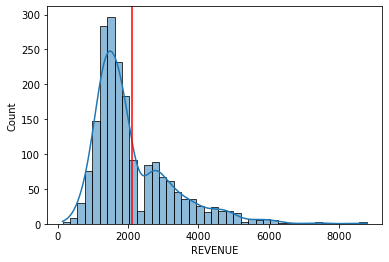

Skewness = 1.6271844095389116
Kurtosis = 3.3467379140524622


In [4]:
sns.histplot(
    x=flagged_df[dependent_variable],
    kde=True
)
plt.axvline(flagged_df[dependent_variable].describe()["mean"], 0, 1, color="red")
plt.show()
print(f"Skewness = {sp.stats.skew(flagged_df[dependent_variable])}")
print(f"Kurtosis = {sp.stats.kurtosis(flagged_df[dependent_variable])}")

The plot and the statistics shows that the data is skewed to the right. Let see what happened to the distribution of the data when the I apply the natural logarithm to the dependent variable.

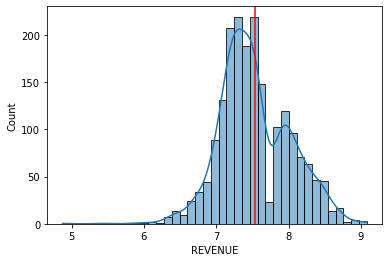

Skewness = 0.19726733559010973
Kurtosis = 0.48099742540546364


In [5]:
transformed_data = flagged_df[dependent_variable].apply(np.log)

sns.histplot(
    x=transformed_data,
    kde=True
)
plt.axvline(transformed_data.describe()["mean"], 0, 1, color="red")
plt.show()
print(f"Skewness = {sp.stats.skew(transformed_data)}")
print(f"Kurtosis = {sp.stats.kurtosis(transformed_data)}")

When the logarithmic transformation is applied to REVENUE, its distribution approximates a normal distribution as seen by the plot and by the values of Skewness and Kurtosis, which are closer to 0. Since this is going to be more useful for the analysis I will do, I will add a new field that will hold the transformed revenue.

Now, I will proceed to perform the visual analysis on the independent variables (also called features)

### Independent Variables (Features)
To analyze the independent variables, you have to consider the nature of the variable it self and its relationship with the dependent variable. This means that an independent continuous variable shouldn't be analyzed the same way as a binary variable.

This being said, this analysis will be divided in two: (1) Continuous and Discrete variables and (2) Binary and Categorical variables.
- **Continuous and Discrete variables**

To perform the visual analysis, I will plot each variable as it is and its logarithmic transformation. The plots I will use for both are the histogram, box plot, scatter plot (with a linear regression estimate), and the KDE plot. The first two will help me to assess the distribution type and outliers, while the latter two will be plotted against the transformed dependent variable (natural logarithm of the Revenue) to look for any patter or trend.

To ease the plotting process, I created a function that draws the previously described plots by receiving name of the feature to assess, the dataset, performs its transformation, and the type of variable to evaluate. This function also applies the logarithmic transformation to the variable and adds it to the features dictionary.

In [6]:
def plot_continuous_discrete(data_df: pd.DataFrame, feature: str, variable_type: str) -> None:
    """
    Creates the necessary plots to visually assess the continuous and discrete variables.
    
    To assess distribution and outliers:
    - Distribution plot
    - Box plot
    
    To visualize correlation between the variable and the dependent variable:
    - Scatter plot (with a linear regression estimate)
    - KDE plot
    
    :param data_df: Pandas DataFrame containing the data to plot.
    :param feature: Name of the feature to plot.
    :param variable_type: Type of the variable to plot.
    
    :return: (Nothing to return).
    """
    global new_features
    global transformed_dependent
    
    new_feat = f'ln_{feature}'
    if new_feat not in new_features[variable_type]:
        new_features[variable_type] += [new_feat]
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10), sharex='col', sharey='row')
    fig.suptitle(f"{feature} & {new_feat}", fontsize=14, fontweight='bold')
    
    sns.histplot(
        x=data_df[feature],
        ax=axes[0, 0],
        kde=True
    )
    sns.boxplot(
        x=data_df[feature],
        ax=axes[1, 0]
    )    
    sns.histplot(
        x=data_df[new_feat],
        ax=axes[0, 1],
        kde=True,
        color="green"
    )
    sns.boxplot(
        x=data_df[new_feat],
        ax=axes[1, 1],
        color="green"
    )
    plt.show()
    
    print(f"Skewness ({feature}) = {sp.stats.skew(data_df[feature])}")
    print(f"Kurtosis ({feature}) = {sp.stats.kurtosis(data_df[feature])} \n")
    
    print(f"Skewness ({new_feat}) = {sp.stats.skew(data_df[new_feat])}")
    print(f"Kurtosis ({new_feat}) = {sp.stats.kurtosis(data_df[new_feat])}")
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10), sharex='col', sharey='row')
    sns.regplot(
        y=transformed_dependent,
        x=feature,
        data=data_df,
        ax=axes[0, 0]
    )
    sns.regplot(
        y=transformed_dependent,
        x=new_feat,
        data=data_df,
        ax=axes[0, 1],
        color="green"
    )
    
    sns.kdeplot(
        y=transformed_dependent,
        x=feature,
        data=data_df,
        ax=axes[1, 0],
        fill=True
    )
    sns.kdeplot(
        y=transformed_dependent,
        x=new_feat,
        data=data_df,
        ax=axes[1, 1],
        fill=True,
        color="green"
    )
    plt.show()

- **Binary and Categorical variables**

The visual analysis for binary and categorical variables will require a different approach. For categorical variables, I will use a box plot, and for binary variables I will use a strip plot. In both cases, I will draw a violin plot overlapping them. I will also draw a point plot against the transformed dependent variable (natural logarithm of Revenue). The first charts (box plot for categorical and violin plot + strip plot for binary) will help me assess the distribution of the variables, while the latter one (the box plot vs the ln_REVENUE) will be used to look for any patterns or trends. I won't make any type of transformation to any of the independent variables.

To ease the plotting process, I created a function that draws the previously described plots by receiving the data set, name of the feature to plot, and the variable type. 

In [7]:
def plot_categorical_binary(data_df: pd.DataFrame, feature: str, variable_type: str) -> None:
    """
    Creates the necessary plots to visually assess the categorical and binary variables.
    
    To assess distribution and outliers:
    - (For non-binary variables) Violin plot + Box plot
    - (For binary variables) Violin plot + Strip plot
    
    To visualize trends and relationship with the dependent variable:
    - Point Plot
    
    :param data_df: Pandas DataFrame containing the data to plot.
    :param feature: Name of the feature to plot.
    :param variable_type: Type of the variable to plot.
    
    :return: (Nothing to return).
    """
    global transformed_dependent
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    fig.suptitle(f"{feature}", fontsize=14, fontweight='bold')
    sns.violinplot(
        x=feature,
        data=data_df,
        ax=axes[0],
        inner=None
    )
    
    if variable_type == 'binary':
        sns.stripplot(
            x=feature,
            data=data_df,
            ax=axes[0],
            color='gray'
        )
    else:
        sns.boxenplot(
            x=feature,
            data=data_df,
            ax=axes[0],
            width=0.08,
            color='gray'
        )
    
    ## As seen in StackOverflow (ImportanceOfBeingErnest, 2017)
    # Begin
    ax = sns.pointplot(
        y=transformed_dependent,
        x=feature,
        data=data_df,
        ax=axes[1],
        color='gray'
    )
    ax = sns.pointplot(
        y=transformed_dependent,
        x=feature,
        data=data_df,
        ax=axes[1],
        palette="dark"
    )
    
    ax.lines[0].set_zorder(2)
    for l  in ax.lines[1:]:
        l.set_zorder(5)
    for c  in ax.collections:
        c.set_zorder(3)
    
    plt.show()
    # End

Since I will start adding new features, I will create a deep copy of the features dictionary. Any new feature created will be added to this copy for future reference.

In [8]:
new_features = copy.deepcopy(original_features)

I will now proceed to plot and analyze each variable

#### Continuous Variables

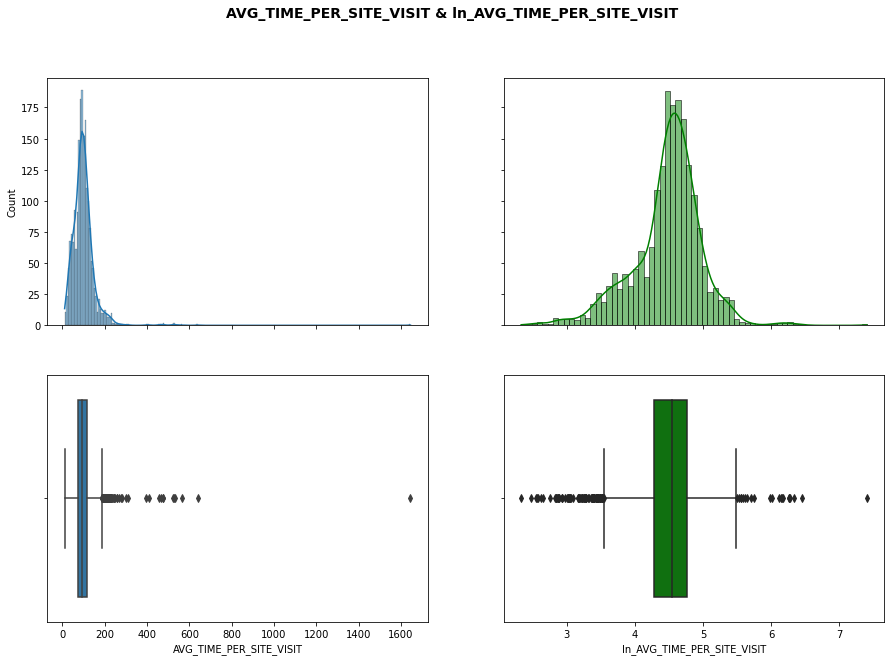

Skewness (AVG_TIME_PER_SITE_VISIT) = 9.633589203857012
Kurtosis (AVG_TIME_PER_SITE_VISIT) = 203.49589401263515 

Skewness (ln_AVG_TIME_PER_SITE_VISIT) = -0.4918489792063107
Kurtosis (ln_AVG_TIME_PER_SITE_VISIT) = 2.1467984704559484


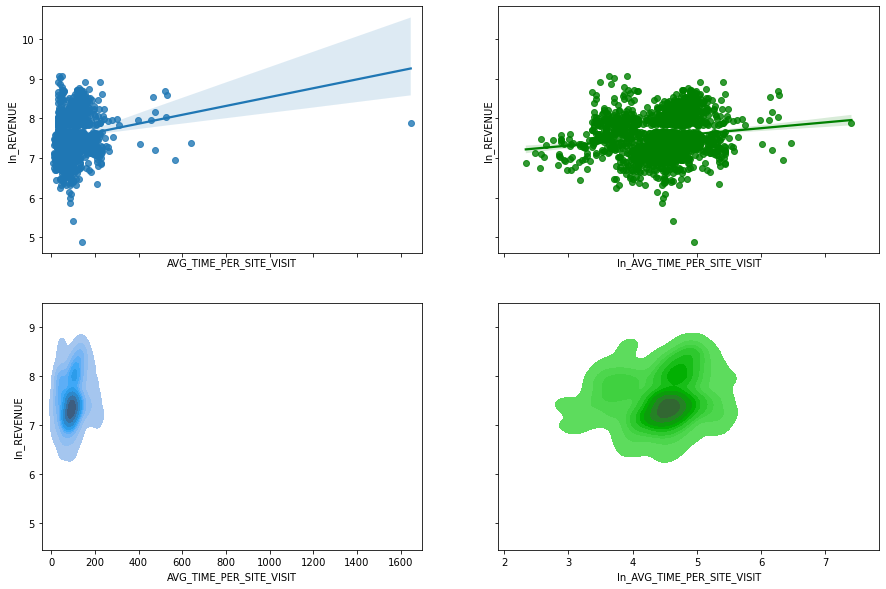

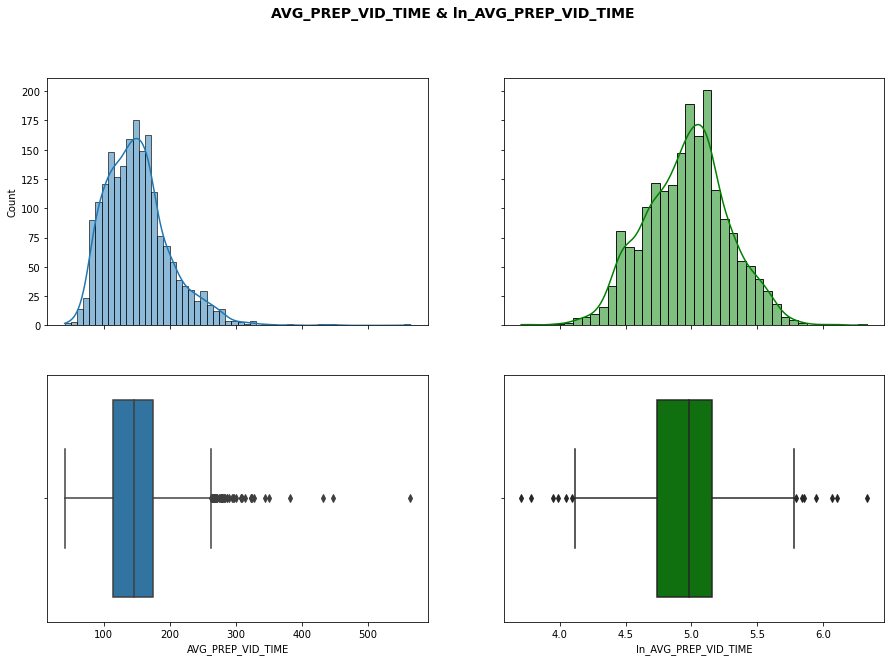

Skewness (AVG_PREP_VID_TIME) = 1.207469858339402
Kurtosis (AVG_PREP_VID_TIME) = 4.080761621495934 

Skewness (ln_AVG_PREP_VID_TIME) = -0.022696086646844554
Kurtosis (ln_AVG_PREP_VID_TIME) = 0.1509436252174301


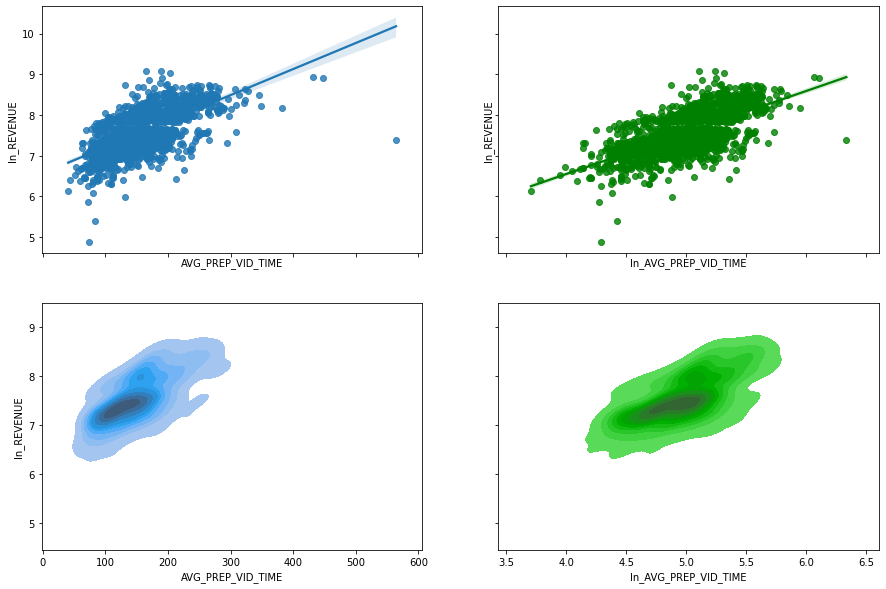

In [9]:
variable_type = "continuous"
features = original_features[variable_type]

for feat in features:
    plot_continuous_discrete(flagged_df, feat, variable_type)

The two variables seem to be approaching to a normal distributions when transformed to natural logarithm. There is even a reduced margin of error in the estimated regression line. The skew and kurtosis statistics of both transformed features are closer to 0 compared to its regular form.

We can also observe some clear outliers in both independen variables:
- AVG_PREP_VID_TIME: When its greater than 350
- AVG_TIME_PER_SITE_VISIT: When its greater than 1000

I will flag this outliers in the [Feature Engineering](#outliers-&-trends) section.

Since I will be using the transformed version of these variables, I will remove from the new_features dictionary the original features so there is no covariance.

In [10]:
new_features['continuous'].remove('AVG_TIME_PER_SITE_VISIT')
new_features['continuous'].remove('AVG_PREP_VID_TIME')

#### Discrete Variables

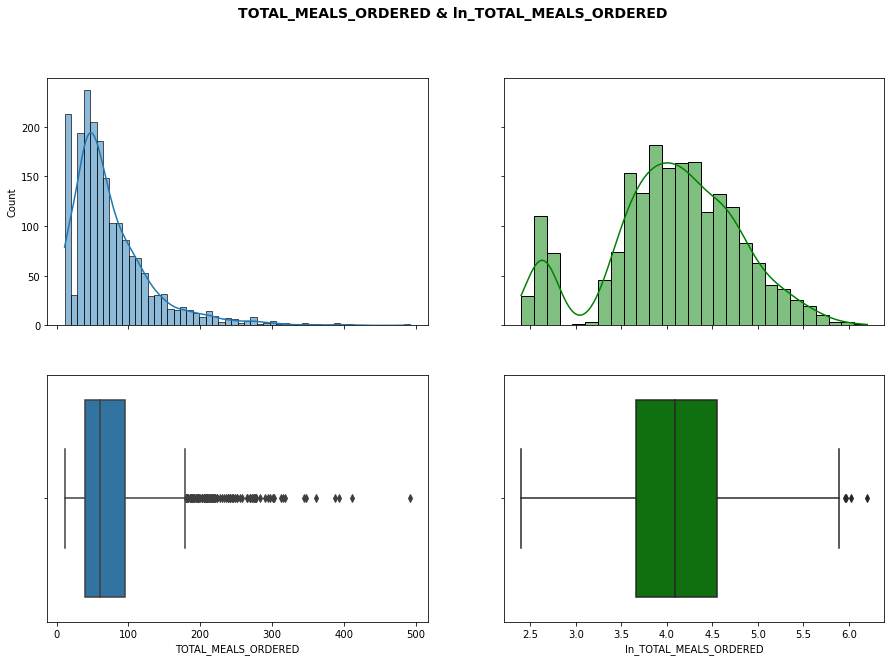

Skewness (TOTAL_MEALS_ORDERED) = 2.00543767178611
Kurtosis (TOTAL_MEALS_ORDERED) = 6.181894358049222 

Skewness (ln_TOTAL_MEALS_ORDERED) = -0.28312715501711816
Kurtosis (ln_TOTAL_MEALS_ORDERED) = -0.061738892647222876


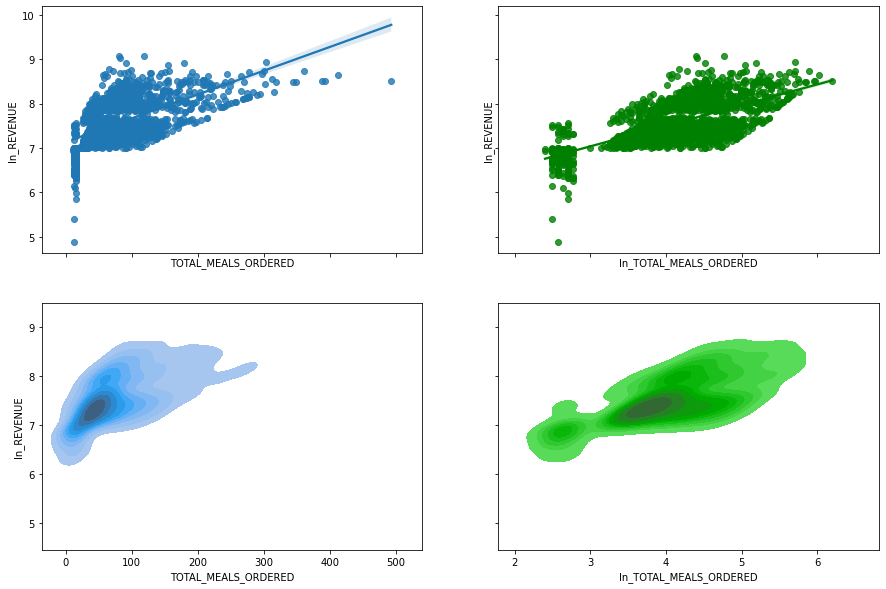

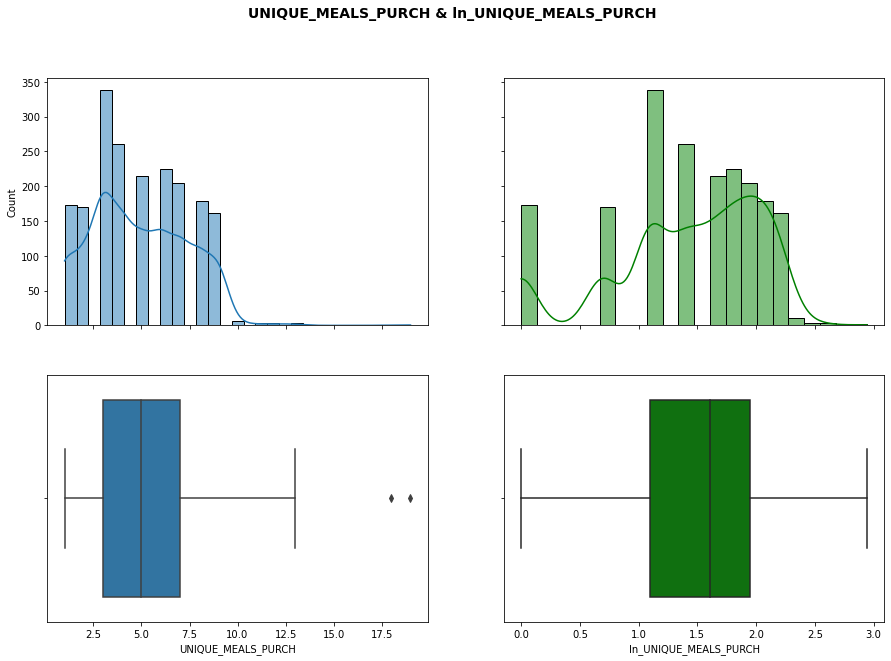

Skewness (UNIQUE_MEALS_PURCH) = 0.3711385671521158
Kurtosis (UNIQUE_MEALS_PURCH) = -0.06150196217077175 

Skewness (ln_UNIQUE_MEALS_PURCH) = -0.8082859528058132
Kurtosis (ln_UNIQUE_MEALS_PURCH) = -0.011324737894186754


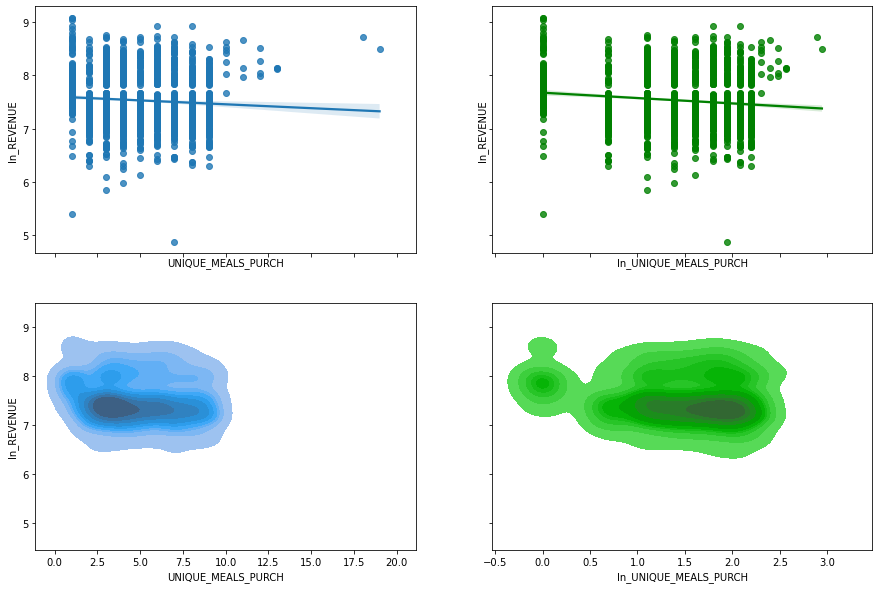

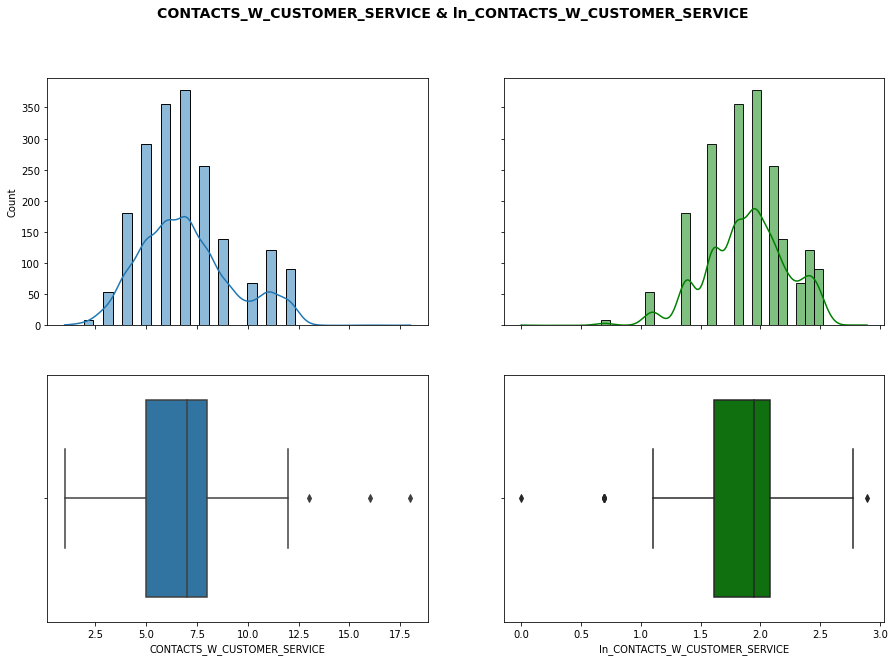

Skewness (CONTACTS_W_CUSTOMER_SERVICE) = 0.5654583235048571
Kurtosis (CONTACTS_W_CUSTOMER_SERVICE) = 0.029275708127018518 

Skewness (ln_CONTACTS_W_CUSTOMER_SERVICE) = -0.376022807966483
Kurtosis (ln_CONTACTS_W_CUSTOMER_SERVICE) = 0.5077677384972881


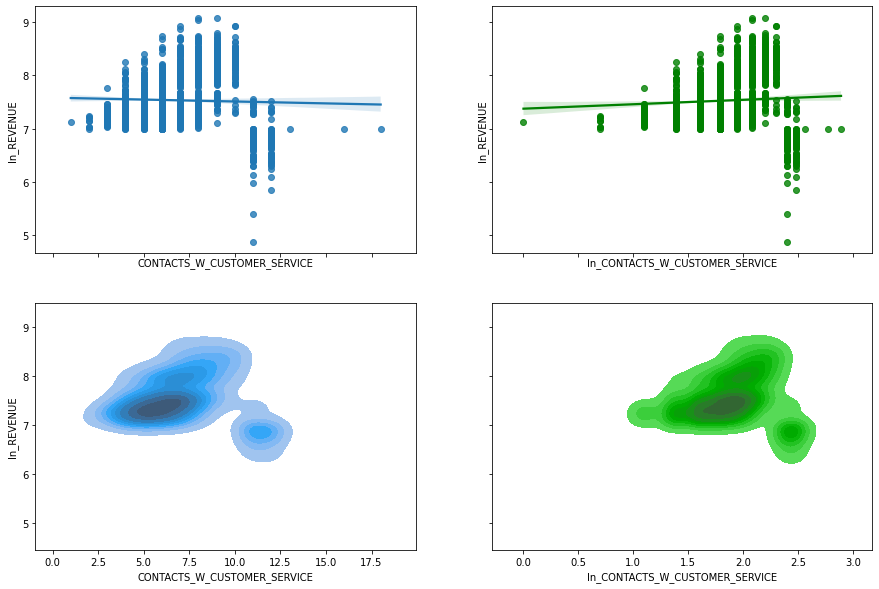

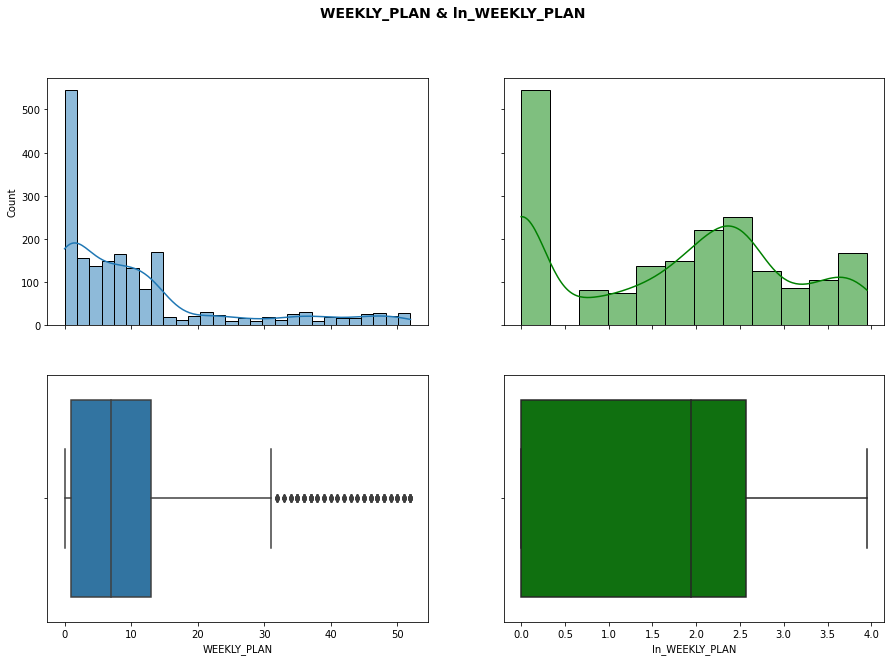

Skewness (WEEKLY_PLAN) = 1.5368585843523275
Kurtosis (WEEKLY_PLAN) = 1.4443991023388243 

Skewness (ln_WEEKLY_PLAN) = -0.052664072533027725
Kurtosis (ln_WEEKLY_PLAN) = -1.2549556475501467


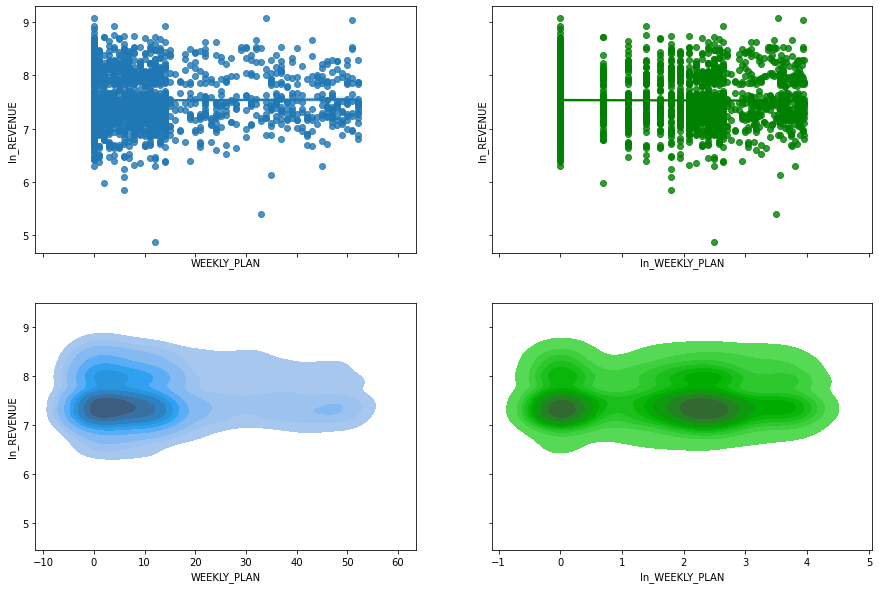

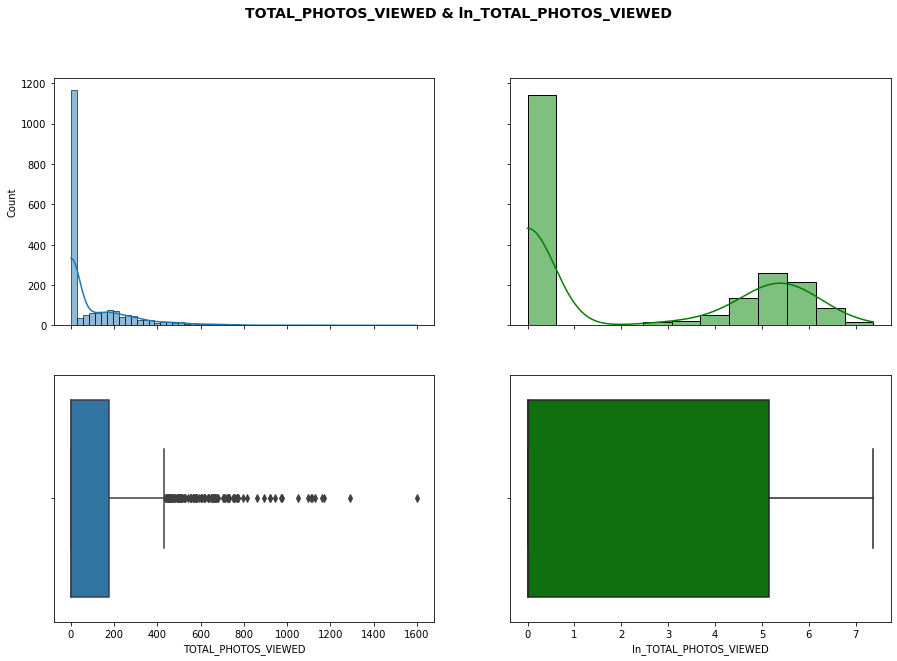

Skewness (TOTAL_PHOTOS_VIEWED) = 2.5117947623220434
Kurtosis (TOTAL_PHOTOS_VIEWED) = 8.735117821649286 

Skewness (ln_TOTAL_PHOTOS_VIEWED) = 0.4652556142609091
Kurtosis (ln_TOTAL_PHOTOS_VIEWED) = -1.6580613341091557


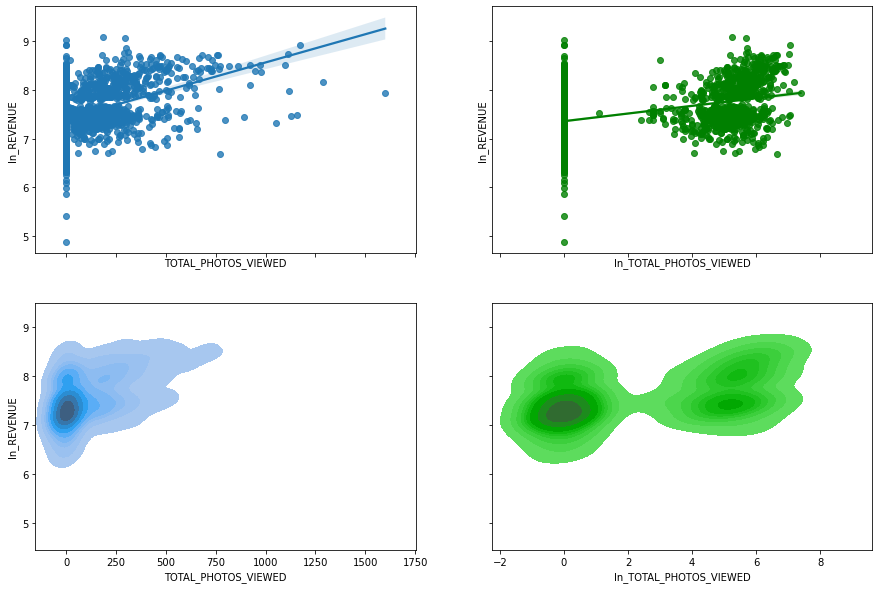

In [11]:
variable_type = "discrete"
features = original_features[variable_type]

for feat in features:
    plot_continuous_discrete(flagged_df, feat, variable_type)

From the plots, the features TOTAL_MEALS_ORDERED, WEEKLY_PLAN, and TOTAL_PHOTOS_VIEWED have a disproportionate number of records in the value 0 that can belong to any Revenue amount. After separating this value, the distribution of variables TOTAL_MEALS_ORDERED, UNIQUE_MEALS_PURCH, WEEKLY_PLAN, and TOTAL_PHOTOS_VIEWED approaches closer to a normal distribution.

Meanwhile, the CONTACTS_W_CUSTOMER_SERVICE shows a change in trend after the value 10. Something similar happens with UNIQUE_MEALS_PURCH that also shows a change in trend after the value 10.

I will flag this values in the [Feature Engineering](#outliers-&-trends) section. For now, I will remove the features that will not be used and keep the ones that approaches more to a normal distribution.

In [12]:
new_features['discrete'].remove('TOTAL_MEALS_ORDERED')
new_features['discrete'].remove('UNIQUE_MEALS_PURCH')
new_features['discrete'].remove('ln_CONTACTS_W_CUSTOMER_SERVICE')
new_features['discrete'].remove('WEEKLY_PLAN')
new_features['discrete'].remove('TOTAL_PHOTOS_VIEWED')

#### Categorical Variables

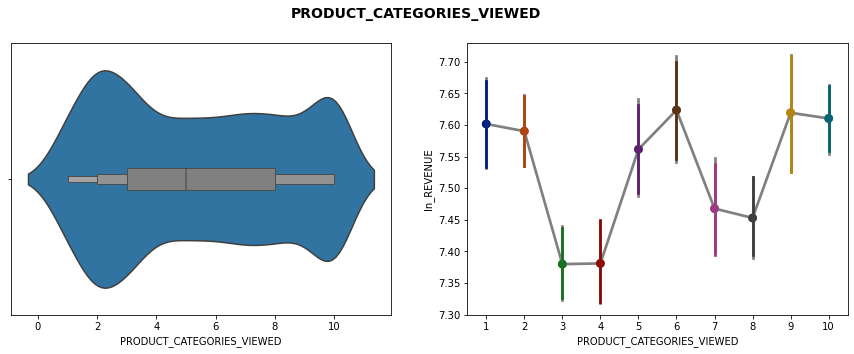

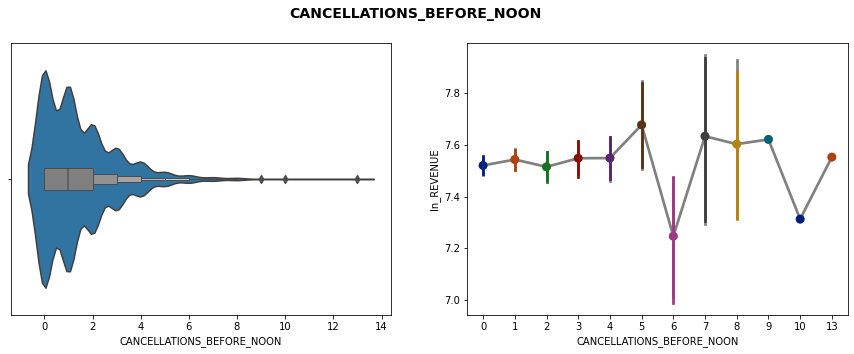

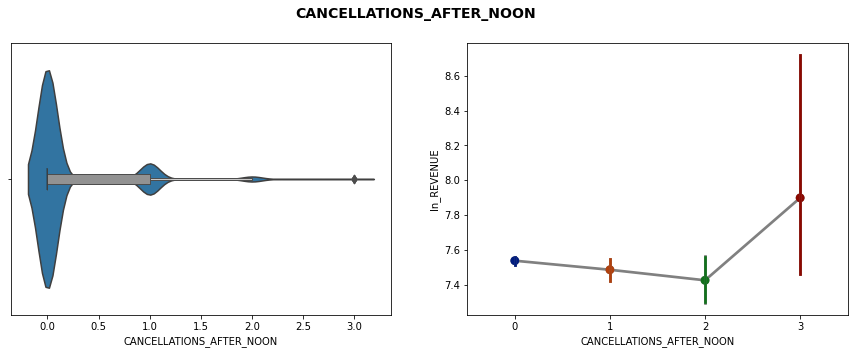

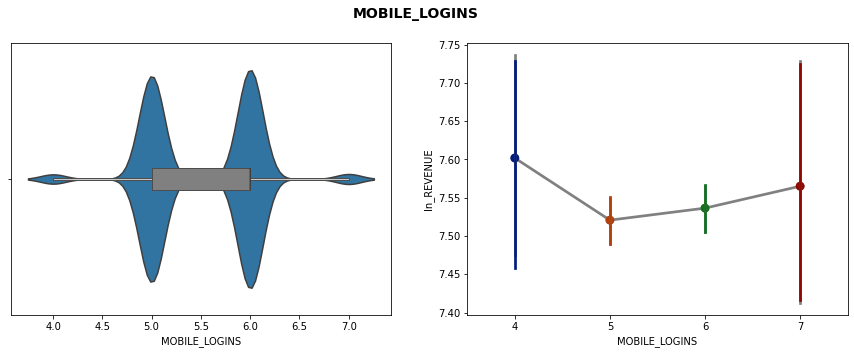

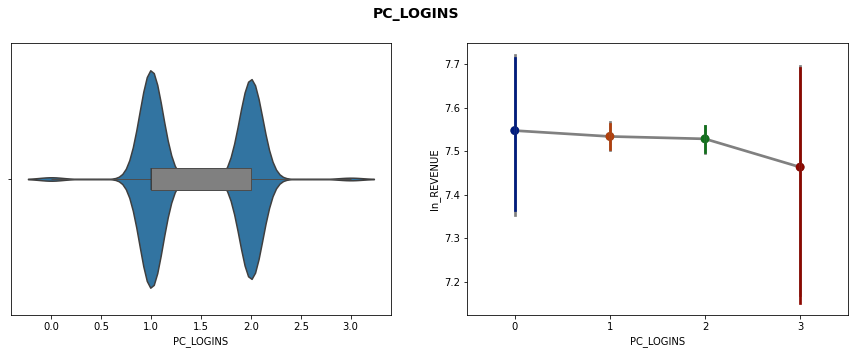

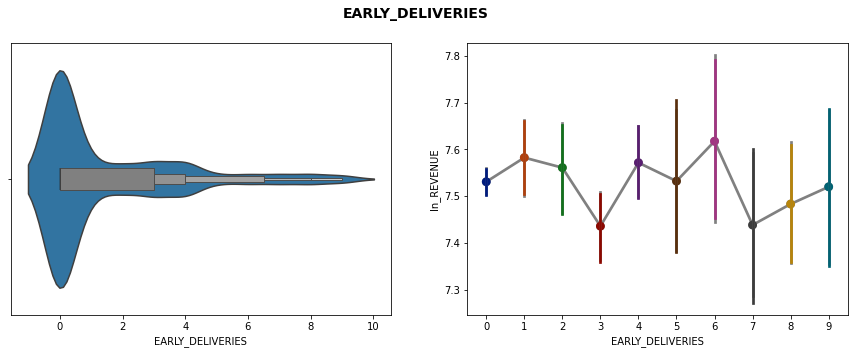

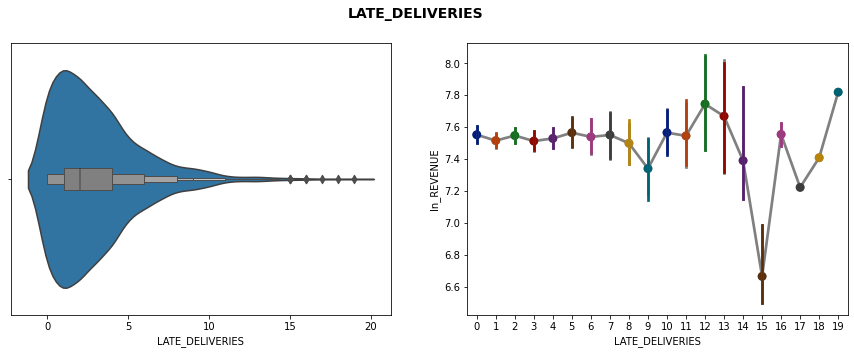

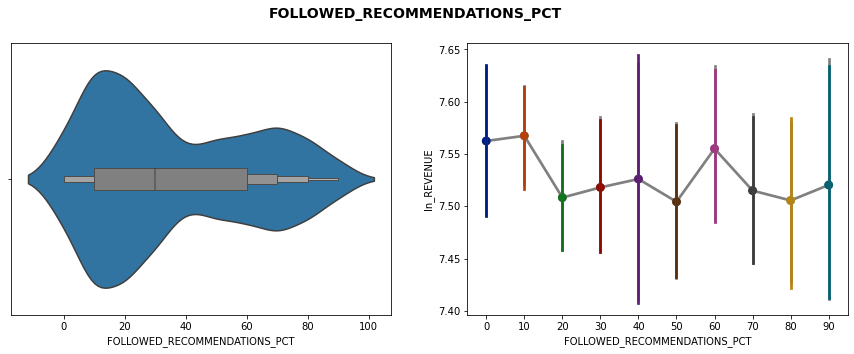

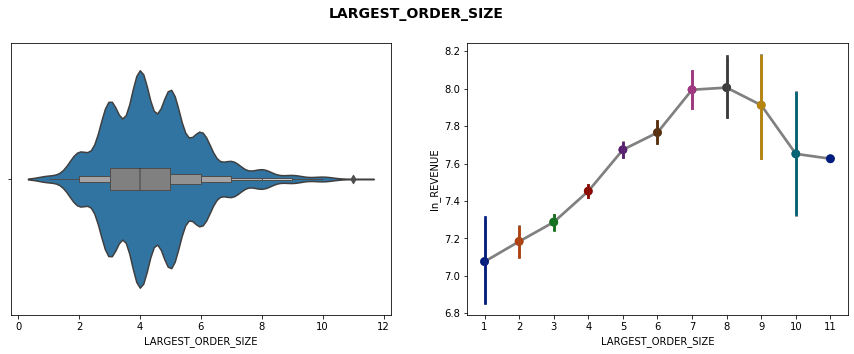

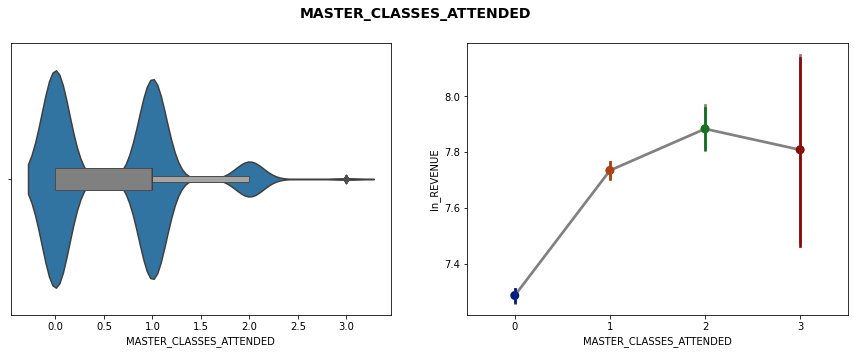

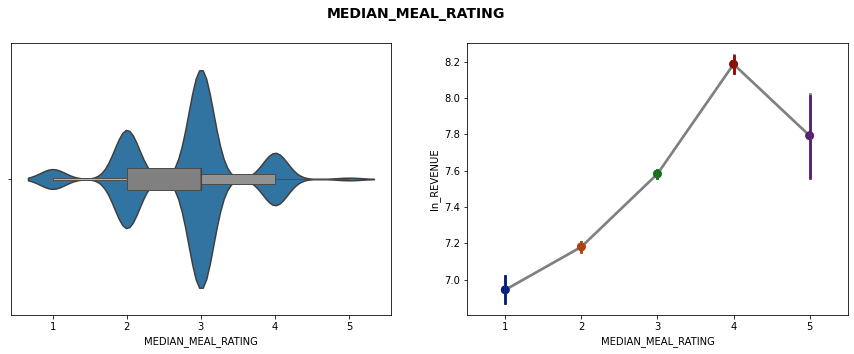

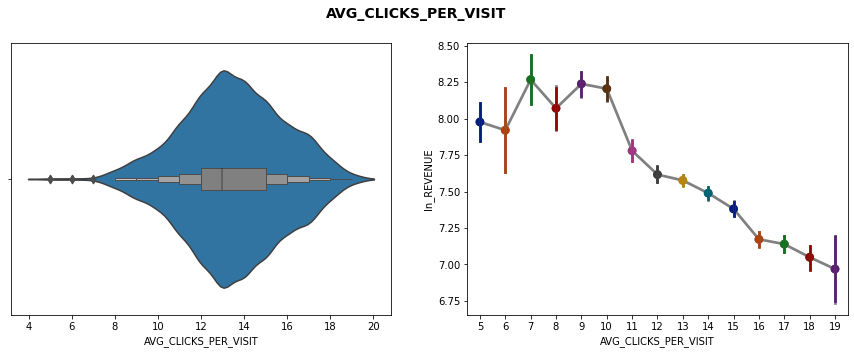

In [13]:
variable_type = "categorical"
features = original_features[variable_type]

for feat in features:
    plot_categorical_binary(flagged_df, feat, variable_type)

I can detect some outliers primarily on the independent variables CANCELLATIONS_BEFORE_NOON (when greater than 5), EARLY_DELIVERIES (when greater than 7), and AVG_CLICKS_PER_VISIT (when lower than 8).

Additionally, I can also see some changes in trends on the variables PRODUCT_CATEGORIES_VIEWED (when greater than 5), FOLLOWED_RECOMMENDATIONS_PCT (when greater than 30), LARGEST_ORDER_SIZE (when greater than 8), MASTER_CLASSES_ATTENDED (when greater than 2), MEDIAN_MEAL_RATING (when greater than 3), LATE_DELIVERIES (when greater than 8), and AVG_CLICKS_PER_VISIT (when greater than 10).

There is also a disproportionate number of observations with the value 0 on CANCELLATIONS_AFTER_NOON.

Finally, there is no observable pattern in MOBILE_LOGINS or PC_LOGINS.

#### Binary Variables

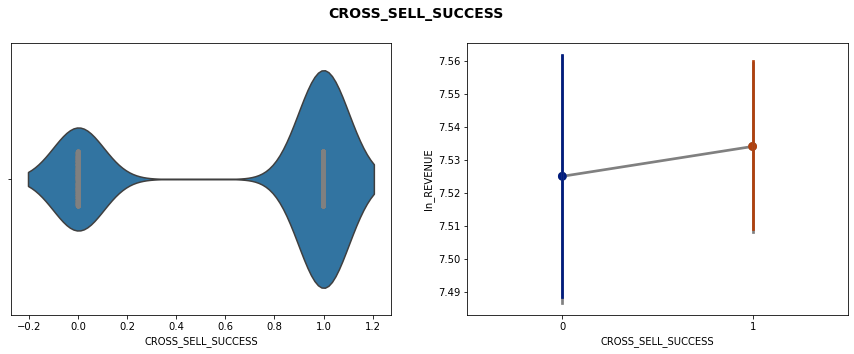

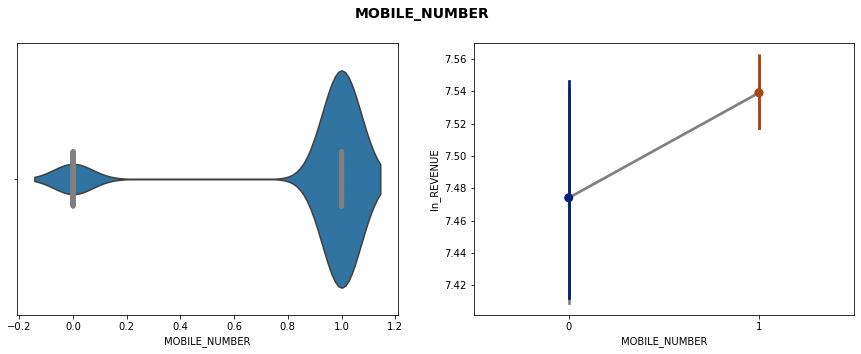

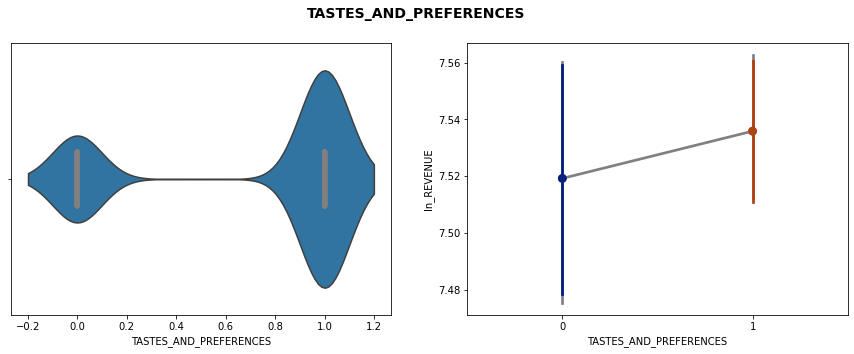

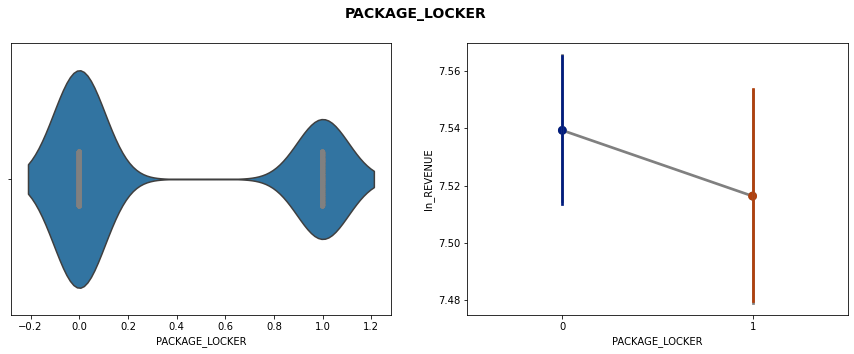

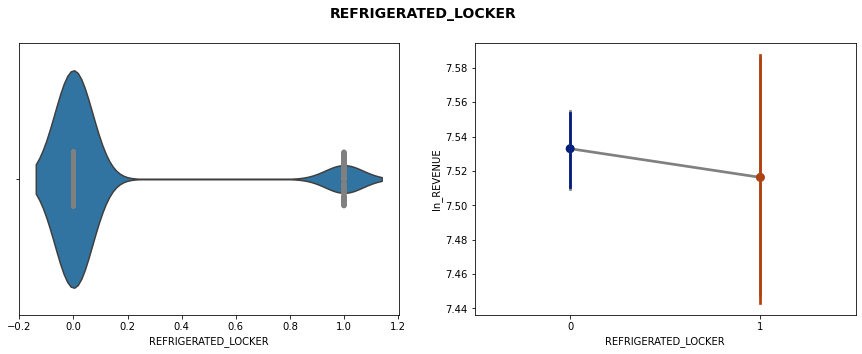

In [14]:
variable_type = "binary"
features = original_features[variable_type]

for feat in features:
    plot_categorical_binary(flagged_df, feat, variable_type)

There is no observable or relevant outlier or trend in any of the binary variables.

***
# Feature Engineering
Feature Engineering is probably the step that helps the most to boost the performance of the model. In this step I will be creating a series of new variables (or features) from the data that I currently have that will help predict the Revenue more accurately.

During the feature engineering I will
1. Handle missing values
1. Handle outliers on independent features
1. Handle trends on independent features
1. Create new features

To ease my task, I will start by creating a series of functions that will help me along this step.

In [15]:
# A dictionary that contains the informationo of which email domain falls into
# what category. It is used in the set_EmailType function.

email_type = {
    "professional" : [
        'mmm.com',
        'amex.com',
        'apple.com',
        'boeing.com',
        'caterpillar.com',
        'chevron.com',
        'cisco.com',
        'cocacola.com',
        'disney.com',
        'dupont.com',
        'exxon.com',
        'ge.org',
        'goldmansacs.com',
        'homedepot.com',
        'ibm.com',
        'intel.com',
        'jnj.com',
        'jpmorgan.com',
        'mcdonalds.com',
        'merck.com',
        'microsoft.com',
        'nike.com',
        'pfizer.com',
        'pg.com',
        'travelers.com',
        'unitedtech.com',
        'unitedhealth.com',
        'verizon.com',
        'visa.com',
        'walmart.com'
    ],
    "personal" : [
        'gmail.com',
        'yahoo.com',
        'protonmail.com'
    ],
    "junk" : [
        'me.com',
        'aol.com',
        'hotmail.com',
        'live.com',
        'msn.com',
        'passport.com'
    ]
}


def set_EmailType(row: pd.Series) -> int:
    """
    It receives an email domain and returns if its can be considered a 
    professional, personal, or junk email
    
    :param email_domain: The domain of the email without the "@".
    
    :return: Returns a string with the category infered from the email_domain.
        It can be "junk" or "not junk".
    """
    result = ""
    email_domain = row["EMAIL"].split("@")[1]
    for key in email_type.keys():
        if email_domain in email_type[key]:
            result = key
            break
    
    if result != 'junk':
        result = 'not junk'
    
    return result


def add_feature_dict(key:str, value:str) -> None:
    """
    Adds a new feature to the new_features dictionary. It evaluates that the 
    value is not already addedd to that key.
    
    :param key: Key of the dictionary where the new feature will be added.
    :param value: Name of the feature to add.
    
    :return: (Nothing to return)
    """
    global new_features
    if key in new_features.keys():
        if value not in new_features[key]:
            new_features[key] += [value]
    else:
        new_features[key] = [value]


def add_dummies(data_df: pd.DataFrame, dummies: pd.DataFrame) -> pd.DataFrame:
    """
    Function that adds a dummy variables to a full data set and add the 
    columns of the dummies to the new_feature dictionary.
    
    :param data_df: DataSet with the full data where.
    :param dummies: DataSet with the dummy features.
    
    :return: A DataFrame that joins the full data set and the dummy data set.
    """
    for dummy_col in dummies.columns:
        add_feature_dict('flags', dummy_col)
        if dummy_col in data_df.columns:
            data_df.drop(dummy_col, axis=1, inplace=True)
    
    return pd.concat([data_df, dummies], axis=1)


def flag_outliers_trends(data_df: pd.DataFrame, flags: dict, inplace:bool=False) -> pd.DataFrame:
    """
    Allows to flag records that belong to an outlier or a trend. It receives 
    a dictionary that specifices the conditions under which the flagging will 
    be done per each variable.
    
    :param data_df: DataFrame with the data where the flagging will be done.
    :param flags: The dictionary that contains the flagging conditions.    
    :param inplace: True if the flagging will be done in the same DataFrame 
        or False if it will be done in a new copy of it. False by default.
    
    :return: A flagged DataFrame under the specified conditions.
    
    Expected structure of the flags dictionary
    {
        VARIABLE_NAME_1: {
            "outlier": ["sign", value]
            "trend": ["sign", [lower limit, uppet limit]]
        }
        VARIABLE_NAME_2: {
            "outlier": ["sign", [lower limit, uppet limit]]
            "trend": ["sign", [value]]
        }
    }
    
    Expected signs:
    (With one values)
        '>': Greater than
        '>=': Greater or equal than
        '<': Lower than
        '<=': Lower or equal than
        '==': Exactly equal as
        '==': Different to
    
    (With two values)
        '><': lower than or greater than
        '=><': lower or equal than or greater than
        '><=': lower than or greater or equal than
        '=><=': lower or equal than or greater or equal than
        'between': between two values (not including either limit)
        '=between': between two values (including the lower but not the upper limit)
        'between=': between two values (not including the lower but including the upper limit)
        '=between=': between two values (including both limits)
    All of these signs expect a list with two values: the lower and the upper limit
    """
    if not inplace:
        data_df = data_df.copy()
    
    for feat in flags.keys():
        for flag in ("outlier", "trend"):
            if flag in flags[feat].keys():
                if len(flags[feat][flag]) > 0:
                    sign = flags[feat][flag][0]
                    value = flags[feat][flag][1]

                    if sign in ('><', '=><', '><=', '=><=', 'between', '=between', 'between=', '=between='):
                        if type(value) != list:
                            raise Exception("Expected a list with two numbers")
                        elif len(value) < 2:
                            raise Exception("Expected a list with two numbers")
                    
                    new_feature = f"{flag[:3]}_{feat}"
                    data_df[new_feature] = 0

                    if sign == '>':
                        data_df.loc[data_df[feat] > value, new_feature] = 1
                    elif sign == '>=':
                        data_df.loc[data_df[feat] >= value, new_feature] = 1
                    elif sign == '<':
                        data_df.loc[data_df[feat] < value, new_feature] = 1
                    elif sign == '<=':
                        data_df.loc[data_df[feat] <= value, new_feature] = 1
                    elif sign == '==':
                        data_df.loc[data_df[feat] == value, new_feature] = 1
                    elif sign == '!=':
                        data_df.loc[data_df[feat] != value, new_feature] = 1
                    elif sign == '><':
                        data_df.loc[
                            (data_df[feat] < value[0]) |
                            (data_df[feat] > value[1]),
                            new_feature
                        ] = 1
                    elif sign == '=><':
                        data_df.loc[
                            (data_df[feat] <= value[0]) |
                            (data_df[feat] > value[1]),
                            new_feature
                        ] = 1
                    elif sign == '><=':
                        data_df.loc[
                            (data_df[feat] <= value[0]) |
                            (data_df[feat] >= value[1]),
                            new_feature
                        ] = 1
                    elif sign == 'between':
                        data_df.loc[
                            (data_df[feat] > value[0]) &
                            (data_df[feat] < value[1]),
                            new_feature
                        ] = 1
                    elif sign == '=between':
                        data_df.loc[
                            (data_df[feat] >= value[0]) &
                            (data_df[feat] < value[1]),
                            new_feature
                        ] = 1
                    elif sign == 'between=':
                        data_df.loc[
                            (data_df[feat] > value[0]) &
                            (data_df[feat] <= value[1]),
                            new_feature
                        ] = 1
                    elif sign == '=between=':
                        data_df.loc[
                            (data_df[feat] >= value[0]) &
                            (data_df[feat] <= value[1]),
                            new_feature
                        ] = 1

                    add_feature_dict('flags', new_feature)
    if inplace:
        return None
    else:
        return data_df

## Missing Values

From the inspection of the data, we can see that there is only one column with missing values, which is the FAMILY_NAME. I will proceed to flag the rows that doesn't have a Family Name. This will allow me to assess if there is a change in the Revenue on those people that registered a last name or not.

In [16]:
new_feat = 'm_FAMILY_NAME'

flagged_df.loc[:, new_feat] = 0
flagged_df.loc[flagged_df['FAMILY_NAME'].isna(), new_feat] = 1

add_feature_dict('flags', new_feat)

## Outliers & Trends

We have already evaluated the outliers and trends on every variable. In this case, I will proceed to create a dictionary that will help me flag those findings and, with the help of the function *flag_outliers_trends* (a function created at the beginning of this section), I will create new variables that will signal which records are considered outliers and which records are part of a second trend for each variable.

In [17]:
to_flag = {
    "AVG_CLICKS_PER_VISIT": {
        "outlier": ['<', 8],
        "trend": ['>', 11]
    },
    "AVG_PREP_VID_TIME": {
        "outlier": ['>', 360]
    },
    "AVG_TIME_PER_SITE_VISIT": {
        "outlier": ['>', 1000]
    },
    "CANCELLATIONS_AFTER_NOON": {
        "trend": ['>', 0]
    },
    "CANCELLATIONS_BEFORE_NOON": {
        "outlier": ['>', 5]
    },
    "CONTACTS_W_CUSTOMER_SERVICE": {
        "trend": ['>', 10]
    },
    "EARLY_DELIVERIES": {
        "outlier": ['>', 7]
    },
    "FOLLOWED_RECOMMENDATIONS_PCT": {
        "trend": ['>', 30]
    },
    "LARGEST_ORDER_SIZE": {
        "trend": ['>', 8]
    },
    "LATE_DELIVERIES": {
        "outlier": ['>', 8]
    },
    "MASTER_CLASSES_ATTENDED": {
        "trend": ['>', 2]
    },
    "MEDIAN_MEAL_RATING": {
        "trend": ['>', 3]
    },
    "PRODUCT_CATEGORIES_VIEWED": {
        "trend": ['>', 5]
    },
    "TOTAL_PHOTOS_VIEWED": {
        "trend": ['>', 0]
    },
    "TOTAL_MEALS_ORDERED": {
        "outlier": ['>', 330]
    },
    "UNIQUE_MEALS_PURCH": {
        "trend": ['>', 10]
    },
    "WEEKLY_PLAN": {
        "trend": ['>', 0]
    }
}

# Removing any feature created
for feat in new_features['flags']:
    if ('out_' in feat) or ('tre_' in feat):
        new_features['flags'].remove(feat)

flag_outliers_trends(flagged_df, to_flag, inplace=True)

The following code will help me visualize the impact that these flags have in the linear regression of their respective variables through visual aids.

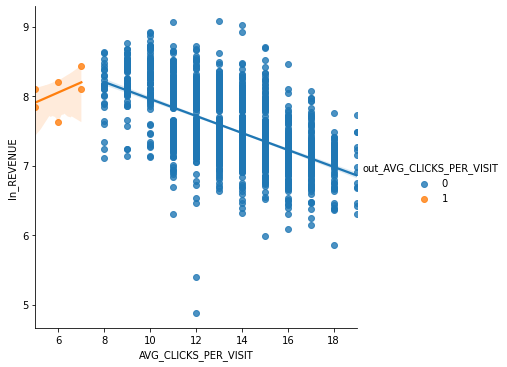

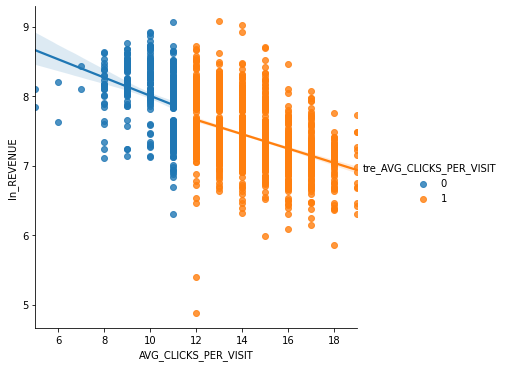

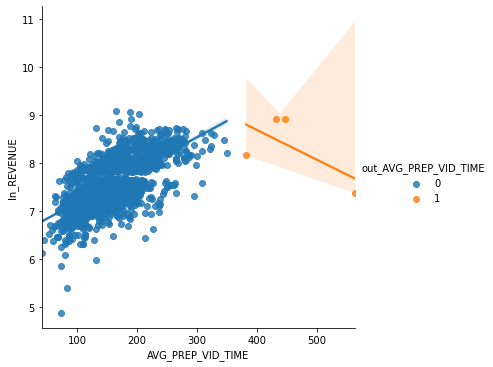

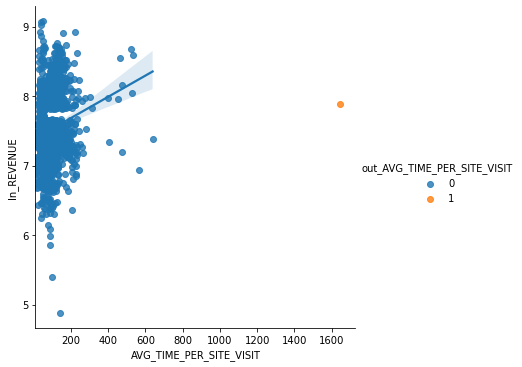

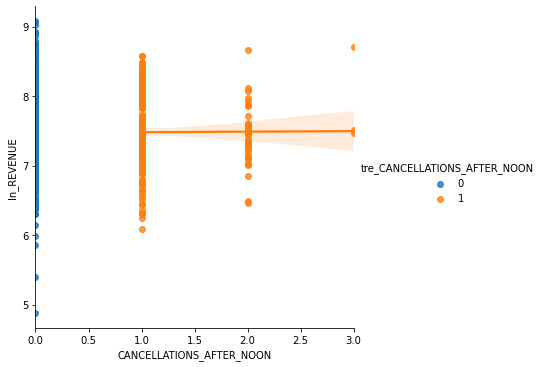

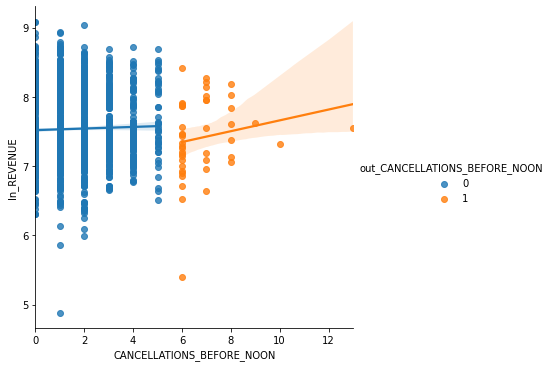

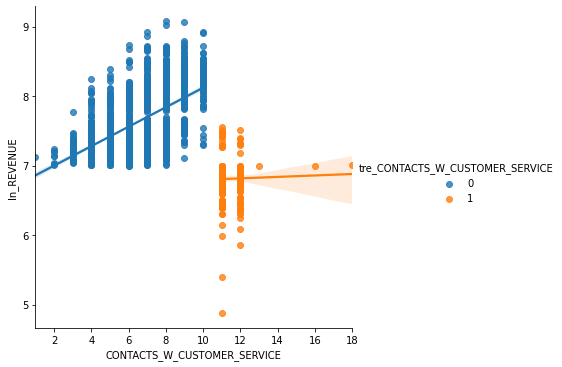

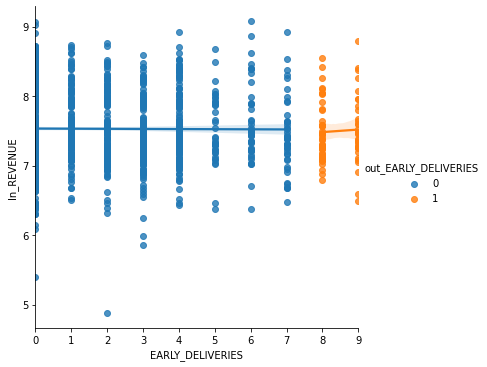

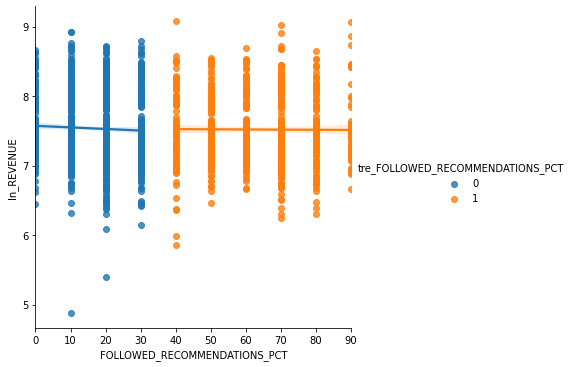

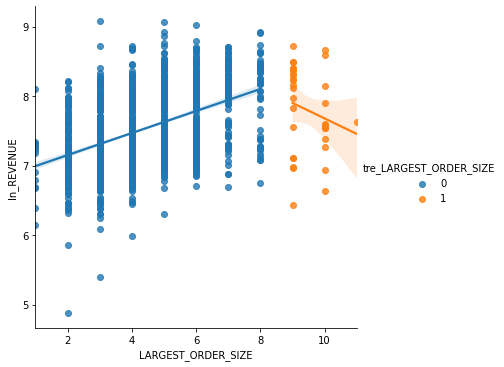

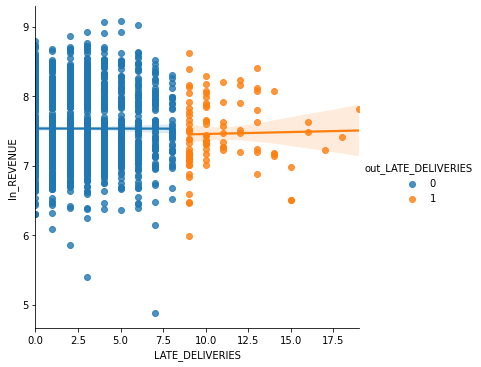

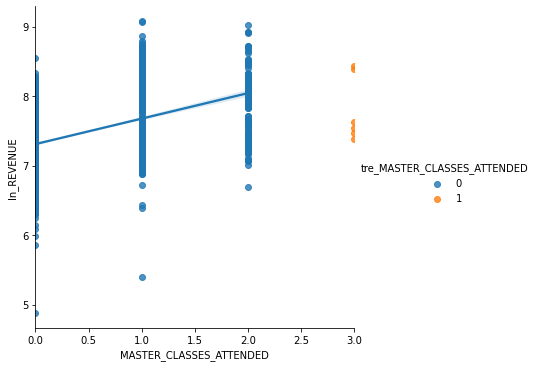

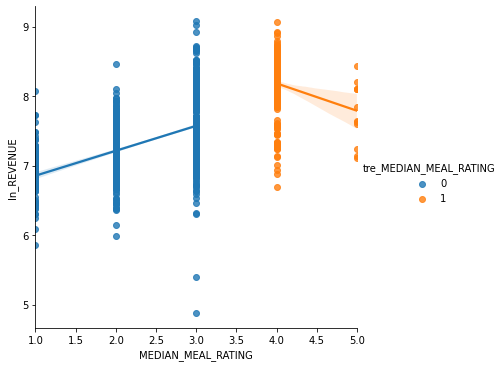

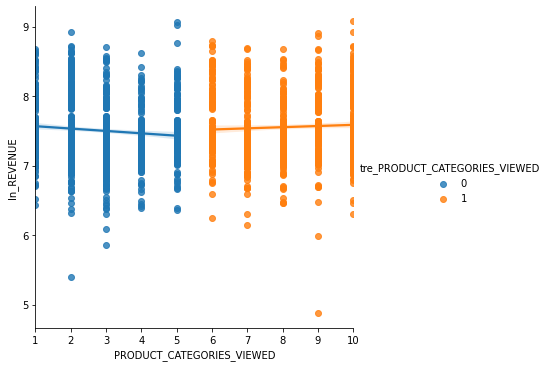

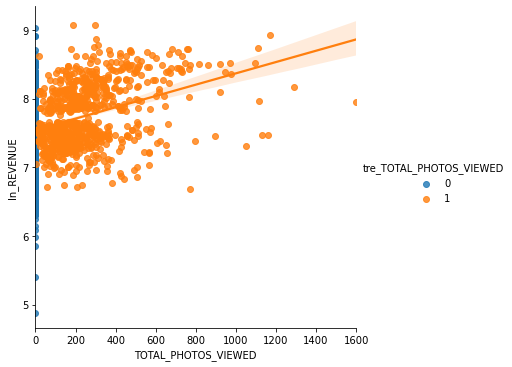

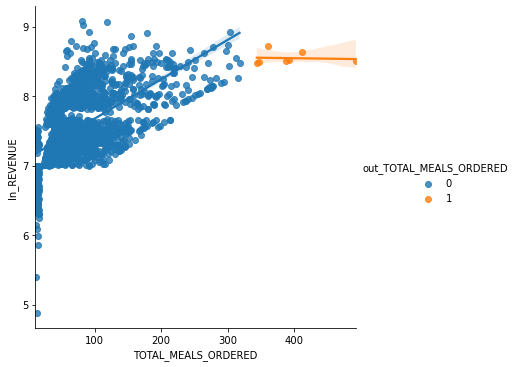

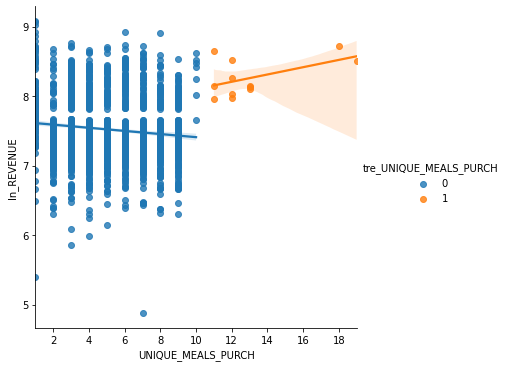

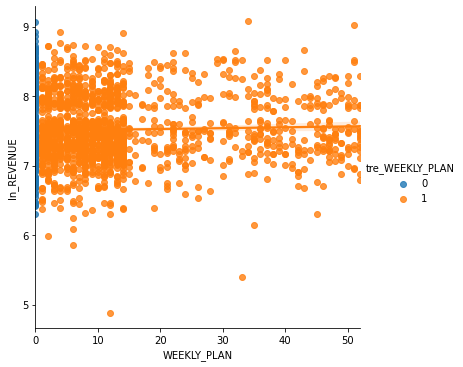

In [18]:
lst_keys = list(to_flag.keys())
lst_keys.sort()

for val in filter(lambda x: x if 'out' in x or 'tre' in x else None, new_features['flags']):
    feat = val[4:]
    if feat in to_flag.keys():
        sns.lmplot(
            x=feat,
            y=transformed_dependent,
            data=flagged_df,
            hue=val
        )
        plt.show()